# Notebook  de classification angle_vitesse

## Importation des biblothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import numpy as np 
#import keras
from sklearn.model_selection import train_test_split
from fonctionsUtiles import architecture
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import time
from fonctionsUtiles import functions as f
from fonctionsUtiles import error
import keras

__init__


Using TensorFlow backend.


In [2]:
#Les arguments pour le modèle DL
args = {"batch_size": 30,
        "augmentation" : True,
       "epochs": 50,
       "val_split":0.2,
       "early_stop":False,
       "patience":6,
       'number_of_classes':5}

## Importation des données

In [3]:
#Donnée collécté du couloir
X_1 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_0.npy')
X_2 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_1.npy')   
X_3 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_2.npy')   
X_4 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_3.npy')    
#Données simmulées
X_simulator = np.load("../Datasets/Simulation/X_simulator.npy")   
#Données du couloir colléctées avant
X_couloir_1 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux.npy')
X_couloir_2 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux2.npy')
X_couloir_3 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux3.npy')
#Donnée du Parking
X_parking = np.load('../Datasets/Old dataset/Really old/X_parking.npy')
#Donnée de IRONCAR
X_IRON_CAR_OLD = np.load('../Datasets/IRON CAR/OLD TRACK/balanced_iron_X.npy')
X_IRON_CAR_NEW = np.load('../Datasets/IRON CAR/NEW TRACK/x_chicane.npy')
#Donnée d'Axionaut
X_axionaut = np.load('../Datasets/Axionaut/X_train_axio.npy')


#Donnée collécté du couloir
Y_angle_1 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_0.npy')
Y_angle_2 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_1.npy')
Y_angle_3 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_2.npy')
Y_angle_4 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_3.npy')
#Données simmulées
Y_angle_simulator = np.load('../Datasets/Simulation/Y_simulator.npy')
#Données du couloir colléctées avant
Y_angle_couloir_1 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux.npy')
Y_angle_couloir_2 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux2.npy')
Y_angle_couloir_3 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux3.npy')
#Donnée du Parking
Y_angle_parking = np.load('../Datasets/Old dataset/Really old/Y_parking.npy')
#Donnée de l'IRON CAR
Y_angle_IRON_CAR_OLD = np.load('../Datasets/IRON CAR/OLD TRACK/balanced_iron_Y.npy')
Y_angle_IRON_CAR_NEW = np.load('../Datasets/IRON CAR/NEW TRACK/y_chicane.npy')
#Donnée d'Axionaut
Y_angle_axionaut = np.load('../Datasets/Axionaut/Y_train_axio.npy')


Y_speed_1 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_0.npy')
Y_speed_2 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_1.npy')
Y_speed_3 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_2.npy')
Y_speed_4 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_3.npy')

# 1- La prédiction des angles

## Preprocessing the data


In [4]:
#On ne prend qu'une partie des données simmulé pour éviter d'en avoir trop chose qui biaisera notre modèle.
X_simulator = X_simulator[:30000]
Y_simulator = Y_angle_simulator[:30000]

Text(0, 0.5, 'Nombre de point')

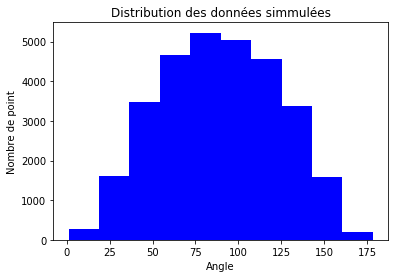

In [5]:
#Distribution des angles dans les données simmulées
plt.hist(Y_simulator , color= 'blue')
plt.title('Distribution des données simmulées')
plt.xlabel("Angle")
plt.ylabel('Nombre de point')

#### Remarque sur la distribution:
Distribution assez équilibrée

In [6]:
#On concatenne les anciens sets de donnée et le set des données simmulées
X = np.concatenate([X_simulator , X_couloir_1, X_couloir_2 , X_couloir_3, X_parking])
Y_angle = np.concatenate([Y_simulator , Y_angle_couloir_1, Y_angle_couloir_2, Y_angle_couloir_3, Y_angle_parking])

In [7]:
del(X_simulator , X_couloir_1, X_couloir_2 , X_couloir_3, X_parking)
del(Y_simulator , Y_angle_couloir_1, Y_angle_couloir_2, Y_angle_couloir_3, Y_angle_parking)

In [8]:
#On enlève les données où on a marche arrière
truncate = list(np.where(Y_angle>180)[0])

X_angle = np.delete(X , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)

In [9]:
print ('The le nombre de point dans notre dataset est' , X_angle.shape[0])

The le nombre de point dans notre dataset est 42307


In [10]:
#On transforme les en classes
if args['number_of_classes'] == 5:
    #Pour 5 classes
    Y_angle[list(np.where(Y_angle<=35))] = 0
    Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2
    Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3
    Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4
    
else:
    #Pour 7 classes
    Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
    Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
    Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
    Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
    Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
    Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche

In [11]:
#Transforming to one hot vector
#Pour l'iron car old
n = Y_angle_IRON_CAR_OLD.shape[0]
Y_angle_IRON_CAR_OLD_new = np.zeros(n)
for i in range(n):
    Y_angle_IRON_CAR_OLD_new[i] = np.argmax(Y_angle_IRON_CAR_OLD[i])
    
#Pour l'iron car nouvelle
n = Y_angle_IRON_CAR_NEW.shape[0]
Y_angle_IRON_CAR_NEW_new = np.zeros(n)
for i in range(n):
    Y_angle_IRON_CAR_NEW_new[i] = np.argmax(Y_angle_IRON_CAR_NEW[i])

#Pour les données Axionaut
n = Y_angle_axionaut.shape[0]
Y_angle_axionaut_new = np.zeros(n)
for i in range(n):
    Y_angle_axionaut_new[i] = np.argmax(Y_angle_axionaut[i])


In [12]:
#On fait entrer les données volées =D
X_angle = np.concatenate([X_angle , X_IRON_CAR_OLD , X_IRON_CAR_NEW , X_axionaut])
Y_angle = np.concatenate([Y_angle , Y_angle_IRON_CAR_OLD_new , Y_angle_IRON_CAR_NEW_new , Y_angle_axionaut_new])


In [13]:
#Pour libérer de l'espace
del(X_IRON_CAR_OLD ,X_parking ,X_IRON_CAR_NEW ,  X_axionaut )
del(Y_angle_IRON_CAR_OLD  ,Y_angle_IRON_CAR_NEW ,  Y_angle_axionaut )


NameError: name 'X_parking' is not defined

In [14]:
#Scaler la data à l'entrée
X_angle = X_angle/255

In [15]:
print('The number of data points is' , X_angle.shape[0])

The number of data points is 86303


Text(0.5, 1.0, 'La distribution des angles dans l ancien set de donnée')

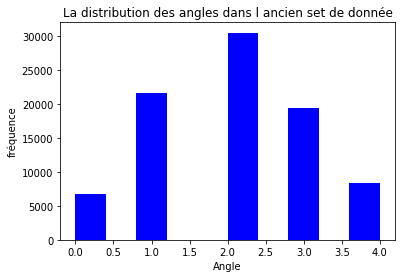

In [16]:
plt.hist(Y_angle  , color = 'blue' )
plt.xlabel('Angle')
plt.ylabel('fréquence')
plt.title('La distribution des angles dans l ancien set de donnée')

### Remarques sur la distribution des données
On remarque que la distribution compte plus de <b> forte gauche </b>que de<b> forte droite  </b> et plus de <b>droite </b> que de<b> gauche  </b>chose qui peut biaiser les résultats, pour régler ce problème nous allos créer de nouvelle donnée en inversant l'image des fortes gauches et de droite.

In [17]:
#On augmente premièrement les données de forte doite pour qu'il soit égale à ceux de forte gauche;
#On augmente ensuite les données de gauche pour qu'il soit égale à ceux de droite
EL = np.where(Y_angle == 4)[0]
print('Le nombre de forte gauche est', len(EL))

ER = np.where(Y_angle == 0)[0]
print('Le nombre de forte doite est', len(ER))

L = np.where(Y_angle == 3)[0]
print('Le nombre de gauche est', len(L))

R = np.where(Y_angle == 1)[0]
print('Le nombre de doite est', len(R))

print('Le nombre de forte droite qui doit être généré est', len(EL)-len(ER))
print('La proportion de forte droite_ générere est', (len(EL)-len(ER))/len(EL))

print('Le nombre de gauche qui doit être généré est', len(R)-len(L))
print('La proportion de gauche générere est', (len(R)-len(L))/len(R))

Le nombre de forte gauche est 8317
Le nombre de forte doite est 6711
Le nombre de gauche est 19316
Le nombre de doite est 21526
Le nombre de forte droite qui doit être généré est 1606
La proportion de forte droite_ générere est 0.1930984730070939
Le nombre de gauche qui doit être généré est 2210
La proportion de gauche générere est 0.10266654278546873


In [18]:
#AUGMENTATION DES FORTES DROITES et des GAUCHES
if args['augmentation']:
    X_flip_ER, Y_flip_ER = f.generate_horizontal_flip(X_angle[EL], Y_angle[EL], proportion = 0.19)
    X_flip_L, Y_flip_L = f.generate_horizontal_flip(X_angle[R], Y_angle[R], proportion = 0.1)

100%|██████████| 2152/2152 [00:00<00:00, 445383.51it/s]


In [19]:
X_angle = np.concatenate((X_angle , X_flip_ER , X_flip_L))
Y_angle = np.concatenate((Y_angle , Y_flip_ER , Y_flip_L))

In [20]:
del(X_flip_ER  ,X_flip_L)
del(Y_flip_ER , Y_flip_L)

In [21]:
EL = np.where(Y_angle == 4)[0]
print('Le nouveau nombre de forte gauche est', len(EL))

ER = np.where(Y_angle == 0)[0]
print('Le nouveau nombre de forte doite est', len(ER))

L = np.where(Y_angle == 3)[0]
print('Le nouveau nombre de gauche est', len(L))

R = np.where(Y_angle == 1)[0]
print('Le nouveau nombre de doite est', len(R))
print('The new number of points is' , X_angle.shape[0])

Le nouveau nombre de forte gauche est 8317
Le nouveau nombre de forte doite est 8291
Le nouveau nombre de gauche est 21468
Le nouveau nombre de doite est 21526
The new number of points is 90035


Text(0.5, 1.0, 'La nouvelle distribution des angles dans l ancien set de donnée')

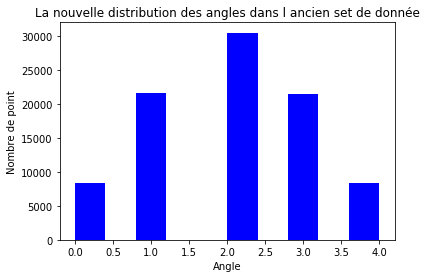

In [22]:
plt.hist(Y_angle , color = 'blue')
plt.xlabel('Angle')
plt.ylabel('Nombre de point')
plt.title('La nouvelle distribution des angles dans l ancien set de donnée')

### Train-test split

In [23]:
#Train test split 
X_train , X_test, Y_train , Y_test = train_test_split(X_angle , Y_angle , test_size = 0.1, stratify = Y_angle)

In [24]:
#Train val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.1, stratify = Y_train)

In [25]:
print('The number of points in the training set is' , X_train.shape[0])
print('The number of points in the validation set is' , X_val.shape[0])
print('The number of points in the test set is' , X_test.shape[0])

The number of points in the training set is 72927
The number of points in the validation set is 8104
The number of points in the test set is 9004


In [26]:
del(X_angle , Y_angle)

Text(0.5, 1.0, 'Distribution des angle dans le training set')

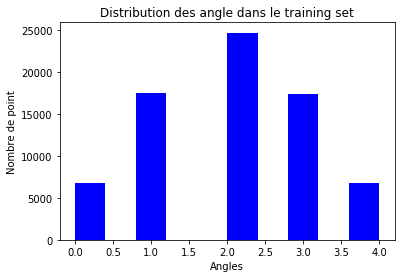

In [27]:
plt.hist(Y_train , color = 'blue')
plt.xlabel('Angles')
plt.ylabel('Nombre de point')
plt.title('Distribution des angle dans le training set')

Text(0.5, 1.0, 'Distribution des angle dans le validation set')

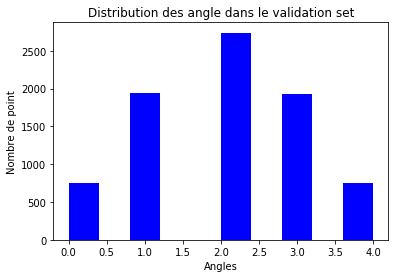

In [28]:
plt.hist(Y_val , color = 'blue')
plt.xlabel('Angles')
plt.ylabel('Nombre de point')
plt.title('Distribution des angle dans le validation set')

Text(0.5, 1.0, 'Distribution des angle dans le test set')

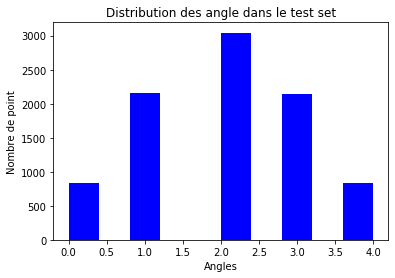

In [29]:
plt.hist(Y_test , color = 'blue')
plt.xlabel('Angles')
plt.ylabel('Nombre de point')
plt.title('Distribution des angle dans le test set')

In [30]:
#Avoir une dummie_variable

Y_train_output = np.zeros((Y_train.shape[0] ,args['number_of_classes'] ))
Y_val_output = np.zeros((Y_val.shape[0] , args['number_of_classes']))
Y_test_output = np.zeros((Y_test.shape[0] , args['number_of_classes']))

for i in range(Y_train.shape[0]):
    n = int(Y_train[i])
    Y_train_output[i , n] = 1

for i in range (Y_val.shape[0]):
    n = int(Y_val[i])
    Y_val_output[i , n] = 1
    
for i in range(Y_test.shape[0]):
    n = int(Y_test[i])
    Y_test_output[i , n] = 1

## Prediction

### Importation du modèle

In [31]:
model_path = '../Models/classification_angle_final_alldatasets'
# Create autopilot model from architectures and print summary
model =  architecture.model_categorical(input_size= (90,250,3))
model.summary()

W0905 09:54:16.944604 140108681590592 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 09:54:17.200015 140108681590592 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 09:54:17.215553 140108681590592 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 09:54:17.304290 140108681590592 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

### Entrainement du modèle

In [32]:
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_acc', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='max')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,Y_train_output,
                nb_epoch=args['epochs'], 
                validation_data=(X_val, Y_val_output),
                callbacks = callbacks_list,
                batch_size = 200,
                )

W0905 09:54:21.928810 140108681590592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 72927 samples, validate on 8104 samples
Epoch 1/50
72927/72927 [==============================] - 69s 950us/step - loss: 0.6899 - acc: 0.7324 - val_loss: 0.9095 - val_acc: 0.6135

Epoch 00001: val_acc improved from -inf to 0.61352, saving model to ../Models/classification_angle_final_alldatasets.hdf5
Epoch 2/50
72927/72927 [==============================] - 67s 912us/step - loss: 0.3266 - acc: 0.8770 - val_loss: 0.4090 - val_acc: 0.8469

Epoch 00002: val_acc improved from 0.61352 to 0.84687, saving model to ../Models/classification_angle_final_alldatasets.hdf5
Epoch 3/50
72927/72927 [==============================] - 67s 912us/step - loss: 0.2306 - acc: 0.9124 - val_loss: 1.3170 - val_acc: 0.7085

Epoch 00003: val_acc did not improve from 0.84687
Epoch 4/50
72927/72927 [==============================] - 67s 913us/step - loss: 0.1874 - acc: 0.9286 - val_loss: 0.2712 - val_acc: 0.9007

Epoch 00004: val_acc improved from 0.84687 to 0.90067, saving model to ../Models/classificatio

72927/72927 [==============================] - 68s 931us/step - loss: 0.0200 - acc: 0.9931 - val_loss: 0.2283 - val_acc: 0.9483

Epoch 00041: val_acc did not improve from 0.95459
Epoch 42/50
72927/72927 [==============================] - 68s 931us/step - loss: 0.0152 - acc: 0.9947 - val_loss: 0.1832 - val_acc: 0.9569

Epoch 00042: val_acc improved from 0.95459 to 0.95693, saving model to ../Models/classification_angle_final_alldatasets.hdf5
Epoch 43/50
72927/72927 [==============================] - 68s 929us/step - loss: 0.0168 - acc: 0.9942 - val_loss: 0.1824 - val_acc: 0.9604

Epoch 00043: val_acc improved from 0.95693 to 0.96039, saving model to ../Models/classification_angle_final_alldatasets.hdf5
Epoch 44/50
72927/72927 [==============================] - 68s 930us/step - loss: 0.0188 - acc: 0.9934 - val_loss: 0.3212 - val_acc: 0.9183

Epoch 00044: val_acc did not improve from 0.96039
Epoch 45/50
72927/72927 [==============================] - 68s 931us/step - loss: 0.0181 - acc: 0.

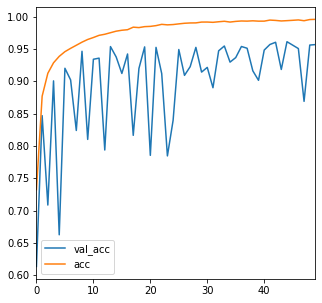

In [33]:
#Plot de l'historique de l'entrainement de l'accuracy
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_acc' , 'acc']].plot(figsize = (5 , 5))

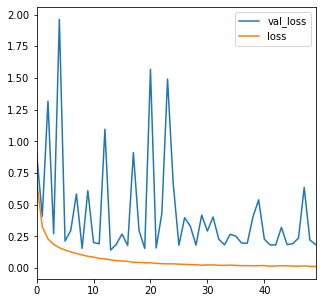

In [34]:
#Plot de l'historique de l'entrainement de la loss la categorical-crossentropy
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_loss' , 'loss']].plot(figsize = (5 , 5))

In [35]:
#On importe le modèle qui nous intéresse

from keras.models import load_model
model = load_model('../Models/classification_angle_final_alldatasets.hdf5')

### Test the model

In [36]:
#We make the prediction
Y_predicted = model.predict(X_test)

In [37]:
#On transforme la probabilité en classe
Y_pred = np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_pred[i] =np.argmax(Y_predicted[i]) 

In [38]:
#On transforme la probabilité en classe
Y_pred = np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_pred[i] =np.argmax(Y_predicted[i]) 

In [39]:
from sklearn.metrics import classification_report

Report = classification_report(Y_test , Y_pred)

In [40]:
print(Report)

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       829
         1.0       0.96      0.97      0.96      2153
         2.0       0.96      0.97      0.97      3043
         3.0       0.95      0.95      0.95      2147
         4.0       0.95      0.93      0.94       832

    accuracy                           0.96      9004
   macro avg       0.96      0.95      0.95      9004
weighted avg       0.96      0.96      0.96      9004



# 2- Freinage

## Preprocessing 

In [41]:
#On discrétise pour freinage et non freinage
#On considère que les vitesses inférieures à 5 sont des freinages
#Pour la première séquence
Y_acc_1 = np.zeros(Y_speed_1.shape[0])

for i in range (Y_speed_1.shape[0]):
    if Y_speed_1[i]<5:
        Y_acc_1[i] = 1
        
#Pour la deuxième séquence
Y_acc_2 = np.zeros(Y_speed_2.shape[0])

for i in range (Y_speed_2.shape[0]):
    if Y_speed_2[i]<5:
        Y_acc_2[i] = 1 

#Pour la toisième séquence
Y_acc_3 = np.zeros(Y_speed_3.shape[0])

for i in range (Y_speed_3.shape[0]):
    if Y_speed_3[i]<5:
        Y_acc_3[i] = 1

#Pour la quatriière séquence
Y_acc_4 = np.zeros(Y_speed_4.shape[0])

for i in range (Y_speed_4.shape[0]):
    if Y_speed_4[i]<5:
        Y_acc_4[i] = 1

In [42]:
#On concatène toute la data
X_speed = np.concatenate([X_1 , X_2 , X_3 , X_4]) 
Y_acc =np.concatenate([Y_acc_1 , Y_acc_2 ,  Y_acc_3 , Y_acc_4])
Y_angle = np.concatenate([Y_angle_1 , Y_angle_2 , Y_angle_3 , Y_angle_4])

In [43]:
#Pour les données de freinage
Y_angle[list(np.where(Y_angle == 270)[0])] = 90

In [44]:
#Enlever les angles correspondant à des marches arrières
truncate = list(np.where(Y_angle>180)[0])

X_speed = np.delete(X_speed , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)
Y_acc = np.delete(Y_acc, truncate , axis = 0)

In [45]:
#On transforme les angles en classe
#Pour 5 classes
if args['number_of_classes'] == 5:
    #Pour 5 classes
    Y_angle[list(np.where(Y_angle<=35))] = 0
    Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2
    Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3
    Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4
    
else:
    #Pour 7 classes
    Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
    Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
    Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
    Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
    Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
    Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche

(array([ 379.,    0., 1088.,    0.,    0., 2381.,    0., 1412.,    0.,
        1040.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

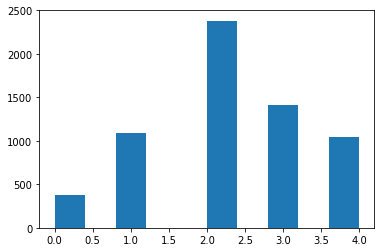

In [46]:
plt.hist(Y_angle)

#### Remarques sur le plot:
Le nombre d'extrème gauche est plus grand que celui d'extrème droite
Le nombre de gauche est plus grand que celui des droites

In [47]:
#On augmente premièrement les données de forte doite pour qu'il soit égale à ceux de forte gauche Pour faire cela on inverse l'image
#On retrouve les imaages de forte gauche
EL = np.where(Y_angle == 4)[0]
print('Le nombre de forte gauche est', len(EL))

ER = np.where(Y_angle == 0)[0]
print('Le nombre de forte doite est', len(ER))

L = np.where(Y_angle == 3)[0]
print('Le nombre de gauche est', len(L))

R = np.where(Y_angle == 1)[0]
print('Le nombre de doite est', len(R))

print('Le nombre de forte droite qui doit être généré est', len(EL)-len(ER))
print('La proportion de forte droite_ générere est', (len(EL)-len(ER))/len(EL))

print('Le nombre de droite qui doit être généré est', len(L)-len(R))
print('La proportion de gauche générere est', (len(L)-len(R))/len(L))

Le nombre de forte gauche est 1040
Le nombre de forte doite est 379
Le nombre de gauche est 1412
Le nombre de doite est 1088
Le nombre de forte droite qui doit être généré est 661
La proportion de forte droite_ générere est 0.635576923076923
Le nombre de droite qui doit être généré est 324
La proportion de gauche générere est 0.22946175637393768


In [48]:
#AUGMENTATION DES FORTES DROITES et des gauches
if args['augmentation']:
    X_flip_ER, Y_flip_ER, Y_flip_ER_acc= f.generate_horizontal_flip_speed(X_speed[EL], Y_angle[EL] , Y_acc[EL], proportion = 0.63)
    X_flip_R, Y_flip_R, Y_flip_R_acc = f.generate_horizontal_flip_speed(X_speed[L], Y_angle[L], Y_acc[L] , proportion = 0.22)

100%|██████████| 310/310 [00:00<00:00, 324005.54it/s]


In [49]:
X_speed = np.concatenate((X_speed , X_flip_ER , X_flip_R))
Y_angle = np.concatenate((Y_angle , Y_flip_ER , Y_flip_R))
Y_acc = np.concatenate((Y_acc , Y_flip_ER_acc , Y_flip_R_acc))

Text(0.5, 1.0, 'La nouvelle distribution des angles dans le nouveau set de donnée')

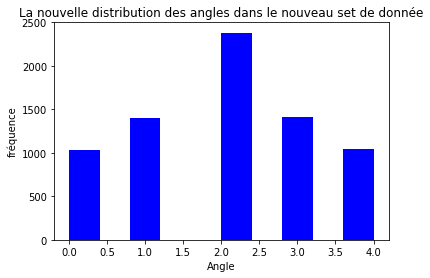

In [50]:
plt.hist(Y_angle , color = 'blue')
plt.xlabel('Angle')
plt.ylabel('fréquence')
plt.title('La nouvelle distribution des angles dans le nouveau set de donnée')

In [51]:
EL = np.where(Y_angle == 4)[0]
print('Le nouveau nombre de forte gauche est', len(EL))

ER = np.where(Y_angle == 0)[0]
print('Le nouveau nombre de forte doite est', len(ER))

L = np.where(Y_angle == 3)[0]
print('Le nouveau nombre de gauche est', len(L))

R = np.where(Y_angle == 1)[0]
print('Le nouveau nombre de doite est', len(R))

Le nouveau nombre de forte gauche est 1040
Le nouveau nombre de forte doite est 1034
Le nouveau nombre de gauche est 1412
Le nouveau nombre de doite est 1398


Text(0.5, 1.0, 'La distribution des commandes de freinage dans le nouveau set de donnée')

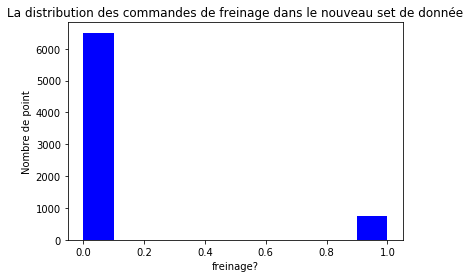

In [52]:
plt.hist(Y_acc , color = 'blue')
plt.xlabel('freinage?')
plt.ylabel('Nombre de point')
plt.title('La distribution des commandes de freinage dans le nouveau set de donnée')

                                    #### Remarques sur la distribution
La distribution comporte beaucoup plus de freinage que de non freinage, chose qui est normale vu le comportement de voiture de course quela voiture doit avoir

### Train-test split

In [53]:
Y_speed = np.concatenate([np.array([Y_acc]) , np.array([Y_angle])] , axis = 0)
Y_speed = Y_speed.T

In [59]:
#train-test split
X_train , X_test , Y_train , Y_test = train_test_split(X_speed , Y_speed , test_size = 0.2 , stratify = Y_acc)

In [60]:
#train-val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2 , stratify = Y_train[: , 0])

In [61]:
print('The number of data points in the training set is' , X_train.shape[0])
print('The number of data points in the validation set is' , X_val.shape[0])
print('The number of data points in the test set is' , X_test.shape[0])


The number of data points in the training set is 4649
The number of data points in the validation set is 1163
The number of data points in the test set is 1453


In [62]:
Y_acc_train = Y_train[: , 0]
Y_angle_train = Y_train[: , 1]

Y_acc_val = Y_val[: , 0]
Y_angle_val = Y_val[: , 1]

Y_acc_test = Y_test[: , 0]
Y_angle_test = Y_test[: , 1]

In [63]:
#dummy vector
Y_angle_train_output = np.zeros((Y_angle_train.shape[0] , args['number_of_classes']))
Y_angle_val_output = np.zeros((Y_angle_val.shape[0] , args['number_of_classes']))
Y_angle_test_output = np.zeros((Y_angle_test.shape[0] , args['number_of_classes']))

for i in range(Y_angle_train.shape[0]):
    n = int(Y_angle_train[i])
    Y_angle_train_output[i , n] = 1

for i in range (Y_angle_val.shape[0]):
    n = int(Y_angle_val[i])
    Y_angle_val_output[i , n] = 1
    
for i in range(Y_angle_test.shape[0]):
    n = int(Y_angle_test[i])
    Y_angle_test_output[i , n] = 1

## Prediction en utilisant Transfer learning

### Importer le modèle

In [64]:
#Import the base Model

from keras.models import load_model
base_model = load_model('../Models/classification_angle_final_alldatasets.hdf5')
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

### Adaptation du modèle

In [65]:
base_model.layers.pop() #enlever la Dense pour l'angle
base_model.layers.pop() #Pour la dropout_16
base_model.layers.pop() #Pour la dense 16

In [66]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [67]:
def transform_model(base_model ,dropout = 0.1 , number_of_classes = 5):
    """
    Inputs:
        -base_model : A Keras Model
        dropout ; the dropou rate
        number_of_classes : The number of classes fro the angle
    Output:
        -A Keras Model
    """
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [68]:
model = transform_model(base_model , 0.5 , 5)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 43, 123, 24)  96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 43, 123, 24)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

### Entrainement du modèle

In [69]:
#Calcul du ratio n_ones/n_points
n_ones = np.where(Y_acc_train == 1)[0].shape[0]
n_zeros = np.where(Y_acc_train == 0)[0].shape[0]
print(n_ones/(n_ones+n_zeros))

0.10453861045386105


In [70]:
import keras
model_path = '../Models/classification_angle_speed_final_alldataset_without_freezing'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.1, 1: 0.9}} 
                )

Train on 4649 samples, validate on 1163 samples
Epoch 1/50
4649/4649 [==============================] - 6s 1ms/step - loss: 1.7278 - angle_out_loss: 1.6069 - speed_out_loss: 0.1208 - angle_out_acc: 0.3685 - speed_out_acc: 0.5130 - val_loss: 1.5599 - val_angle_out_loss: 1.1575 - val_speed_out_loss: 0.4024 - val_angle_out_acc: 0.5116 - val_speed_out_acc: 0.8014

Epoch 00001: val_speed_out_loss improved from inf to 0.40239, saving model to ../Models/classification_angle_speed_final_alldataset_without_freezing.hdf5
Epoch 2/50
4649/4649 [==============================] - 3s 636us/step - loss: 1.2391 - angle_out_loss: 1.1520 - speed_out_loss: 0.0871 - angle_out_acc: 0.5390 - speed_out_acc: 0.6834 - val_loss: 1.5044 - val_angle_out_loss: 1.0866 - val_speed_out_loss: 0.4178 - val_angle_out_acc: 0.5546 - val_speed_out_acc: 0.8134

Epoch 00002: val_speed_out_loss did not improve from 0.40239
Epoch 3/50
4649/4649 [==============================] - 3s 643us/step - loss: 0.9946 - angle_out_loss: 0.

4649/4649 [==============================] - 3s 642us/step - loss: 0.1017 - angle_out_loss: 0.0923 - speed_out_loss: 0.0094 - angle_out_acc: 0.9738 - speed_out_acc: 0.9806 - val_loss: 0.9325 - val_angle_out_loss: 0.7464 - val_speed_out_loss: 0.1861 - val_angle_out_acc: 0.7988 - val_speed_out_acc: 0.9347

Epoch 00021: val_speed_out_loss did not improve from 0.12600
Epoch 22/50
4649/4649 [==============================] - 3s 652us/step - loss: 0.0882 - angle_out_loss: 0.0769 - speed_out_loss: 0.0113 - angle_out_acc: 0.9806 - speed_out_acc: 0.9783 - val_loss: 0.7562 - val_angle_out_loss: 0.6283 - val_speed_out_loss: 0.1279 - val_angle_out_acc: 0.8289 - val_speed_out_acc: 0.9604

Epoch 00022: val_speed_out_loss did not improve from 0.12600
Epoch 23/50
4649/4649 [==============================] - 3s 643us/step - loss: 0.0834 - angle_out_loss: 0.0744 - speed_out_loss: 0.0089 - angle_out_acc: 0.9789 - speed_out_acc: 0.9802 - val_loss: 0.7133 - val_angle_out_loss: 0.5725 - val_speed_out_loss: 

4649/4649 [==============================] - 3s 652us/step - loss: 0.0408 - angle_out_loss: 0.0368 - speed_out_loss: 0.0040 - angle_out_acc: 0.9908 - speed_out_acc: 0.9929 - val_loss: 1.0103 - val_angle_out_loss: 0.8674 - val_speed_out_loss: 0.1429 - val_angle_out_acc: 0.8074 - val_speed_out_acc: 0.9596

Epoch 00042: val_speed_out_loss did not improve from 0.10485
Epoch 43/50
4649/4649 [==============================] - 3s 642us/step - loss: 0.0299 - angle_out_loss: 0.0262 - speed_out_loss: 0.0037 - angle_out_acc: 0.9946 - speed_out_acc: 0.9903 - val_loss: 0.7115 - val_angle_out_loss: 0.5515 - val_speed_out_loss: 0.1600 - val_angle_out_acc: 0.8856 - val_speed_out_acc: 0.9544

Epoch 00043: val_speed_out_loss did not improve from 0.10485
Epoch 44/50
4649/4649 [==============================] - 3s 644us/step - loss: 0.0195 - angle_out_loss: 0.0163 - speed_out_loss: 0.0032 - angle_out_acc: 0.9963 - speed_out_acc: 0.9942 - val_loss: 0.8808 - val_angle_out_loss: 0.6499 - val_speed_out_loss: 

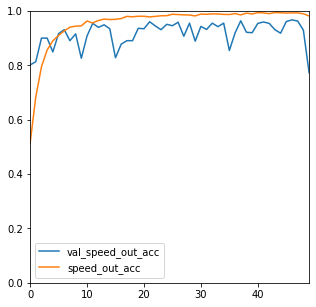

In [71]:
#Speed out Accuracy
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'speed_out_acc']].plot( figsize = (5 , 5) )
plt.ylim(0 , 1)
plt.show()

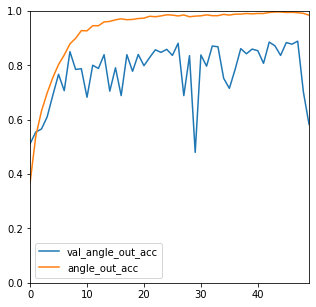

In [72]:
#angle out accuracy
historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_angle_out_acc' , 'angle_out_acc']].plot( figsize = (5 , 5) )
plt.ylim(0 , 1)
plt.show()

In [73]:
#On garde le meilleur modèle
from keras.models import load_model
model = load_model('../Models/classification_angle_speed_final_alldataset_without_freezing.hdf5')

### Test du modèle

In [74]:
Y_predicted = model.predict(X_test)

In [75]:
#Transformer la proba en classe
Y_pred_angle = np.zeros(Y_predicted[0].shape[0])
for i in range(Y_predicted[0].shape[0]):
    Y_pred_angle[i] =np.argmax(Y_predicted[0][i]) 

In [76]:
#Transformer la proba en classe
Y_pred_speed = np.zeros(Y_predicted[1].shape[0])
for i in range(Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        Y_pred_speed[i] = 1

In [77]:
from sklearn.metrics import classification_report

Report_angle = classification_report(Y_angle_test , Y_pred_angle)
Report_speed = classification_report(Y_acc_test , Y_pred_speed)

In [78]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       205
         1.0       0.83      0.78      0.81       288
         2.0       0.84      0.87      0.85       485
         3.0       0.78      0.86      0.82       293
         4.0       0.94      0.82      0.88       182

    accuracy                           0.85      1453
   macro avg       0.86      0.84      0.85      1453
weighted avg       0.85      0.85      0.85      1453



In [79]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1301
         1.0       0.82      0.92      0.87       152

    accuracy                           0.97      1453
   macro avg       0.90      0.95      0.93      1453
weighted avg       0.97      0.97      0.97      1453



# Test d'autres possibilités de Transfer Learning

## a-Test avec la "dense8 & dropout_12" : ON

In [80]:
#Import the base Model

from keras.models import load_model
base_model = load_model('../Models/classification_angle_final_alldatasets.hdf5')
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [81]:
base_model.layers.pop()  #enlever la dense pour l'angle_out

In [82]:
base_model.summary() #Résumer après transformation

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [83]:
def transform_model(base_model ,dropout = 0.1 , number_of_classes = 5):
    """
    Inputs:
        -base_model : A Keras Model
        dropout ; the dropou rate
        number_of_classes : The number of classes fro the angle
    Output:
        -A Keras Model
    """
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [84]:
model = transform_model(base_model)

In [85]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 43, 123, 24)  96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 43, 123, 24)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

### Entrainement du modèle

In [86]:
#Calcul du ratio n_ones/n_points
n_ones = np.where(Y_acc_train == 1)[0].shape[0]
n_zeros = np.where(Y_acc_train == 0)[0].shape[0]
print(n_ones/(n_ones+n_zeros))

0.10453861045386105


In [87]:
import keras
model_path = '../Models/classification_angle_speed_final_test'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.1, 1: 0.9}} 
                )

Train on 4649 samples, validate on 1163 samples
Epoch 1/50
4649/4649 [==============================] - 7s 1ms/step - loss: 1.3973 - angle_out_loss: 1.2790 - speed_out_loss: 0.1182 - angle_out_acc: 0.4668 - speed_out_acc: 0.4790 - val_loss: 1.5699 - val_angle_out_loss: 1.0067 - val_speed_out_loss: 0.5633 - val_angle_out_acc: 0.5950 - val_speed_out_acc: 0.6767

Epoch 00001: val_speed_out_loss improved from inf to 0.56326, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 2/50
4649/4649 [==============================] - 3s 677us/step - loss: 0.9250 - angle_out_loss: 0.8380 - speed_out_loss: 0.0870 - angle_out_acc: 0.6705 - speed_out_acc: 0.6847 - val_loss: 1.4796 - val_angle_out_loss: 0.7897 - val_speed_out_loss: 0.6900 - val_angle_out_acc: 0.6844 - val_speed_out_acc: 0.6053

Epoch 00002: val_speed_out_loss did not improve from 0.56326
Epoch 3/50
4649/4649 [==============================] - 3s 678us/step - loss: 0.7027 - angle_out_loss: 0.6396 - speed_out_loss: 

4649/4649 [==============================] - 3s 671us/step - loss: 0.0632 - angle_out_loss: 0.0552 - speed_out_loss: 0.0080 - angle_out_acc: 0.9837 - speed_out_acc: 0.9832 - val_loss: 1.0256 - val_angle_out_loss: 0.8526 - val_speed_out_loss: 0.1730 - val_angle_out_acc: 0.7807 - val_speed_out_acc: 0.9467

Epoch 00021: val_speed_out_loss did not improve from 0.11550
Epoch 22/50
4649/4649 [==============================] - 3s 682us/step - loss: 0.0626 - angle_out_loss: 0.0532 - speed_out_loss: 0.0094 - angle_out_acc: 0.9852 - speed_out_acc: 0.9794 - val_loss: 0.8280 - val_angle_out_loss: 0.6693 - val_speed_out_loss: 0.1587 - val_angle_out_acc: 0.8315 - val_speed_out_acc: 0.9501

Epoch 00022: val_speed_out_loss did not improve from 0.11550
Epoch 23/50
4649/4649 [==============================] - 3s 663us/step - loss: 0.0471 - angle_out_loss: 0.0393 - speed_out_loss: 0.0078 - angle_out_acc: 0.9884 - speed_out_acc: 0.9811 - val_loss: 1.0324 - val_angle_out_loss: 0.8064 - val_speed_out_loss: 

4649/4649 [==============================] - 3s 667us/step - loss: 0.0325 - angle_out_loss: 0.0290 - speed_out_loss: 0.0035 - angle_out_acc: 0.9903 - speed_out_acc: 0.9933 - val_loss: 0.7589 - val_angle_out_loss: 0.6258 - val_speed_out_loss: 0.1331 - val_angle_out_acc: 0.8659 - val_speed_out_acc: 0.9639

Epoch 00042: val_speed_out_loss did not improve from 0.10495
Epoch 43/50
4649/4649 [==============================] - 3s 668us/step - loss: 0.0287 - angle_out_loss: 0.0246 - speed_out_loss: 0.0042 - angle_out_acc: 0.9931 - speed_out_acc: 0.9940 - val_loss: 0.7377 - val_angle_out_loss: 0.5685 - val_speed_out_loss: 0.1692 - val_angle_out_acc: 0.8727 - val_speed_out_acc: 0.9510

Epoch 00043: val_speed_out_loss did not improve from 0.10495
Epoch 44/50
4649/4649 [==============================] - 3s 684us/step - loss: 0.0309 - angle_out_loss: 0.0254 - speed_out_loss: 0.0055 - angle_out_acc: 0.9933 - speed_out_acc: 0.9905 - val_loss: 0.8581 - val_angle_out_loss: 0.6836 - val_speed_out_loss: 

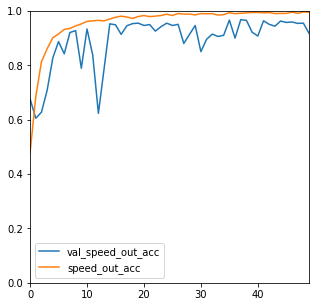

In [88]:
#Speed out Accuracy
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'speed_out_acc']].plot( figsize = (5 , 5) )
plt.ylim(0 , 1)
plt.show()

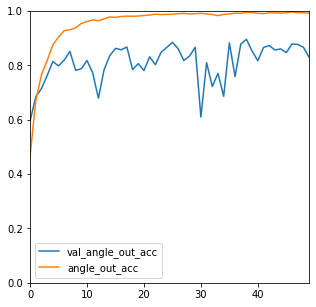

In [89]:
#angle out accuracy
historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_angle_out_acc' , 'angle_out_acc']].plot( figsize = (5 , 5) )
plt.ylim(0 , 1)
plt.show()

### Test the model:

In [90]:
#On importe le meilleur modèle

model = load_model('../Models/classification_angle_speed_final_test.hdf5')

In [91]:
Y_predicted = model.predict(X_test)

In [92]:
#Transformer la proba en classe
Y_pred_angle = np.zeros(Y_predicted[0].shape[0])
for i in range(Y_predicted[0].shape[0]):
    Y_pred_angle[i] =np.argmax(Y_predicted[0][i])

In [93]:
#Transformer la proba en classe
Y_pred_speed = np.zeros(Y_predicted[1].shape[0])
for i in range(Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        Y_pred_speed[i] = 1

In [94]:
from sklearn.metrics import classification_report

Report_angle = classification_report(Y_angle_test , Y_pred_angle)
Report_speed = classification_report(Y_acc_test , Y_pred_speed)

In [95]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       205
         1.0       0.79      0.89      0.84       288
         2.0       0.89      0.88      0.88       485
         3.0       0.88      0.82      0.85       293
         4.0       0.94      0.88      0.91       182

    accuracy                           0.87      1453
   macro avg       0.88      0.88      0.88      1453
weighted avg       0.88      0.87      0.87      1453



In [96]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1301
         1.0       0.84      0.93      0.88       152

    accuracy                           0.97      1453
   macro avg       0.92      0.95      0.93      1453
weighted avg       0.98      0.97      0.97      1453



## b-Test avec les deux fcs "dense7 & dropout_11 & dense8 & dropout 12" en off:

In [97]:
#Import the base Model

from keras.models import load_model
base_model = load_model('../Models/classification_angle_final_alldatasets.hdf5')
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [98]:
base_model.layers.pop()  #enlever la dense pour l'angle_out
base_model.layers.pop()  #enlever la dense pour la dropout_12
base_model.layers.pop()  #enlever la dense pour la dense_8
base_model.layers.pop()  #enlever la dense pour la dropout_11
base_model.layers.pop()  #enlever la dense pour la dense_7

In [99]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [100]:
def transform_model(base_model ,dropout = 0.1 , number_of_classes = 5):
    """
    Inputs:
        -base_model : A Keras Model
        dropout ; the dropou rate
        number_of_classes : The number of classes fro the angle
    Output:
        -A Keras Model
    """
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [101]:
model = transform_model(base_model)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 43, 123, 24)  96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 43, 123, 24)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

### Entrainement du modèle

In [102]:
import keras
model_path = '../Models/classification_angle_speed_final_test'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.1, 1: 0.9}} 
                )

Train on 4649 samples, validate on 1163 samples
Epoch 1/50
4649/4649 [==============================] - 7s 2ms/step - loss: 1.2345 - angle_out_loss: 1.1486 - speed_out_loss: 0.0859 - angle_out_acc: 0.5401 - speed_out_acc: 0.6801 - val_loss: 1.6456 - val_angle_out_loss: 1.2745 - val_speed_out_loss: 0.3711 - val_angle_out_acc: 0.4927 - val_speed_out_acc: 0.8409

Epoch 00001: val_speed_out_loss improved from inf to 0.37114, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 2/50
4649/4649 [==============================] - 3s 658us/step - loss: 0.7533 - angle_out_loss: 0.7077 - speed_out_loss: 0.0456 - angle_out_acc: 0.7380 - speed_out_acc: 0.8813 - val_loss: 1.1211 - val_angle_out_loss: 0.7822 - val_speed_out_loss: 0.3388 - val_angle_out_acc: 0.7051 - val_speed_out_acc: 0.8702

Epoch 00002: val_speed_out_loss improved from 0.37114 to 0.33884, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 3/50
4649/4649 [==============================] 

4649/4649 [==============================] - 3s 640us/step - loss: 0.0378 - angle_out_loss: 0.0339 - speed_out_loss: 0.0039 - angle_out_acc: 0.9888 - speed_out_acc: 0.9916 - val_loss: 0.6132 - val_angle_out_loss: 0.5207 - val_speed_out_loss: 0.0924 - val_angle_out_acc: 0.8538 - val_speed_out_acc: 0.9682

Epoch 00021: val_speed_out_loss improved from 0.09380 to 0.09244, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 22/50
4649/4649 [==============================] - 3s 643us/step - loss: 0.0390 - angle_out_loss: 0.0360 - speed_out_loss: 0.0030 - angle_out_acc: 0.9877 - speed_out_acc: 0.9942 - val_loss: 0.6059 - val_angle_out_loss: 0.5159 - val_speed_out_loss: 0.0900 - val_angle_out_acc: 0.8727 - val_speed_out_acc: 0.9751

Epoch 00022: val_speed_out_loss improved from 0.09244 to 0.09005, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 23/50
4649/4649 [==============================] - 3s 643us/step - loss: 0.0404 - angle_out_loss: 0.

4649/4649 [==============================] - 3s 645us/step - loss: 0.0259 - angle_out_loss: 0.0244 - speed_out_loss: 0.0015 - angle_out_acc: 0.9929 - speed_out_acc: 0.9963 - val_loss: 0.9757 - val_angle_out_loss: 0.8091 - val_speed_out_loss: 0.1665 - val_angle_out_acc: 0.8091 - val_speed_out_acc: 0.9622

Epoch 00042: val_speed_out_loss did not improve from 0.08934
Epoch 43/50
4649/4649 [==============================] - 3s 647us/step - loss: 0.0251 - angle_out_loss: 0.0231 - speed_out_loss: 0.0020 - angle_out_acc: 0.9931 - speed_out_acc: 0.9963 - val_loss: 1.5333 - val_angle_out_loss: 1.3393 - val_speed_out_loss: 0.1940 - val_angle_out_acc: 0.6896 - val_speed_out_acc: 0.9458

Epoch 00043: val_speed_out_loss did not improve from 0.08934
Epoch 44/50
4649/4649 [==============================] - 3s 644us/step - loss: 0.0214 - angle_out_loss: 0.0195 - speed_out_loss: 0.0019 - angle_out_acc: 0.9931 - speed_out_acc: 0.9959 - val_loss: 0.8544 - val_angle_out_loss: 0.7540 - val_speed_out_loss: 

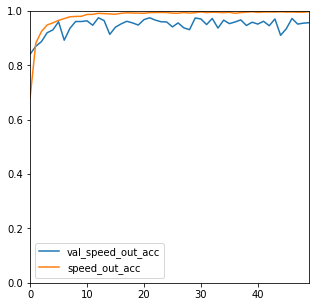

In [103]:
#Speed out Accuracy
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'speed_out_acc']].plot( figsize = (5 , 5) )
plt.ylim(0 , 1)
plt.show()

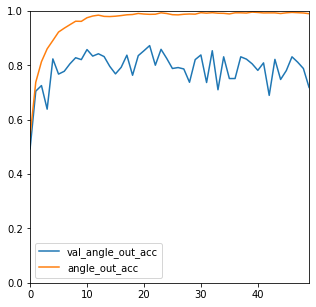

In [104]:
#angle out accuracy
historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_angle_out_acc' , 'angle_out_acc']].plot( figsize = (5 , 5) )
plt.ylim(0 , 1)
plt.show()

###  Test the model

In [105]:
model  = load_model("../Models/classification_angle_speed_final_test.hdf5")

In [106]:
Y_predicted = model.predict(X_test)

In [107]:
#Transformer la proba en classe
Y_pred_angle = np.zeros(Y_predicted[0].shape[0])
for i in range(Y_predicted[0].shape[0]):
    Y_pred_angle[i] =np.argmax(Y_predicted[0][i])

In [108]:
#Transformer la proba en classe
Y_pred_speed = np.zeros(Y_predicted[1].shape[0])
for i in range(Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        Y_pred_speed[i] = 1

In [109]:
from sklearn.metrics import classification_report

Report_angle = classification_report(Y_angle_test , Y_pred_angle)
Report_speed = classification_report(Y_acc_test , Y_pred_speed)

In [110]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.88       205
         1.0       0.74      0.84      0.78       288
         2.0       0.87      0.81      0.84       485
         3.0       0.86      0.75      0.80       293
         4.0       0.94      0.86      0.90       182

    accuracy                           0.83      1453
   macro avg       0.84      0.85      0.84      1453
weighted avg       0.84      0.83      0.83      1453



In [111]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1301
         1.0       0.90      0.89      0.89       152

    accuracy                           0.98      1453
   macro avg       0.94      0.94      0.94      1453
weighted avg       0.98      0.98      0.98      1453



#### Commentaire sur les résultats
Résultats moins bons que ce qui précède

## c-Test avec du freezing

On freeze le modèle déja entrainé et on effectue le fine-tuning sur ce qui reste

In [112]:
#Import the base Model

from keras.models import load_model
base_model = load_model('../Models/classification_angle_final_alldatasets.hdf5')
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [113]:
#On crèe un nouveau modèle similaire à celui d'anvant avec une seule variante c'est la Batch Noramlization qui devient en mode inférence
def create_copy_model (input_size = (90 , 250 , 3) , dropout = 0.1):
    import keras
    from keras.layers import Input, Dense, merge
    from keras.models import Model
    from keras.layers import Conv2D, MaxPooling2D, Reshape, BatchNormalization
    from keras.layers import Activation, Dropout, Flatten, Dense , LSTM , concatenate , core, Reshape 


    
    img_in = Input(shape=input_size, name='img_in')                     
    x = img_in
    
    x = Conv2D(24, 5,5, subsample=(2,2))(x)       
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(32, 5,5, subsample=(2,2))(x)   
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(64, 5,5, subsample=(2,2))(x)     
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3,3) , subsample=(2,2))(x)       
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3,3) , subsample=(1,1))(x)    
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
       
    x = Dropout(dropout)(x)


    x = Flatten(name='flattened')(x)                                       
    x = Dense(1024, activation='relu')(x)                                   
    x = Dropout(dropout)(x)
    x = Dense(50, activation='relu')(x)                                     
    x = Dropout(dropout)(x)                                                      
    
    #categorical output of the angle
    angle_out = Dense(5, activation='softmax', name='angle_out')(x)       
    model = Model(inputs = img_in, outputs = angle_out)
    
    model.compile(optimizer='adam',
                  loss={
                      'angle_out' : 'categorical_crossentropy'                       } ,
                  
                  metrics={
                      'angle_out' : 'accuracy'                          }
                           )
    return model

In [114]:
copy_model = create_copy_model()

In [115]:
#copy the weights
copy_model.set_weights(base_model.get_weights())

In [116]:
copy_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_18 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_18 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_19 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 20, 60, 32)        0         
__________

In [117]:
copy_model.layers.pop() #Angle_out
copy_model.layers.pop() #dropout_30
copy_model.layers.pop()  #Dense_4

In [118]:
model = transform_model(copy_model)

In [119]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 43, 123, 24)  96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 43, 123, 24)  0           batch_normalization_18[0][0]     
__________________________________________________________________________________________________
conv2d_7 (

In [120]:
#Essaie en gardant 5 couches de convolution
for layer in model.layers[:20]:
    print(layer.name)
    layer.trainable = False
print('--------------------------------------')

for layer in model.layers[20:]:
    print(layer.name)
    layer.trainable = True


img_in
conv2d_6
batch_normalization_18
activation_18
conv2d_7
batch_normalization_19
activation_19
conv2d_8
batch_normalization_20
activation_20
conv2d_9
batch_normalization_21
activation_21
conv2d_10
batch_normalization_22
activation_22
dropout_16
flattened
dense_3
dropout_17
--------------------------------------
Dense_3
Dense_1
batch_normalization_25
batch_normalization_23
activation_25
activation_23
dropout_21
dropout_19
Dense_4
Dense_2
batch_normalization_26
batch_normalization_24
activation_26
activation_24
dropout_22
dropout_20
angle_out
speed_out


### Training the model

In [ ]:
import keras
model_path = '../Models/classification_angle_speed_final_alldatasets_freezing'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.1, 1: 0.9}} 
                )

Train on 4649 samples, validate on 1163 samples
Epoch 1/50
4649/4649 [==============================] - 8s 2ms/step - loss: 1.6491 - angle_out_loss: 1.5341 - speed_out_loss: 0.1150 - angle_out_acc: 0.3551 - speed_out_acc: 0.5113 - val_loss: 2.1957 - val_angle_out_loss: 1.5364 - val_speed_out_loss: 0.6593 - val_angle_out_acc: 0.3603 - val_speed_out_acc: 0.6105

Epoch 00001: val_loss improved from inf to 2.19573, saving model to ../Models/classification_angle_speed_final_alldatasets_freezing.hdf5
Epoch 2/50
4649/4649 [==============================] - 3s 647us/step - loss: 1.2062 - angle_out_loss: 1.1243 - speed_out_loss: 0.0818 - angle_out_acc: 0.5436 - speed_out_acc: 0.7279 - val_loss: 2.3286 - val_angle_out_loss: 1.6803 - val_speed_out_loss: 0.6483 - val_angle_out_acc: 0.3310 - val_speed_out_acc: 0.6371

Epoch 00002: val_loss did not improve from 2.19573
Epoch 3/50
4649/4649 [==============================] - 3s 658us/step - loss: 1.0029 - angle_out_loss: 0.9398 - speed_out_loss: 0.06

### Testing

In [72]:
model = load_model('../Models/classification_angle_speed_final_alldatasets_freezing.hdf5')

In [ ]:
Y_predicted = model.predict(X_test)

In [ ]:
#Transformer la proba en classe
Y_pred_angle = np.zeros(Y_predicted[0].shape[0])
for i in range(Y_predicted[0].shape[0]):
    Y_pred_angle[i] =np.argmax(Y_predicted[0][i])

In [77]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       198
         1.0       0.84      0.86      0.85       280
         2.0       0.88      0.87      0.87       462
         3.0       0.83      0.82      0.83       297
         4.0       0.90      0.93      0.92       216

    accuracy                           0.87      1453
   macro avg       0.87      0.87      0.87      1453
weighted avg       0.87      0.87      0.87      1453



In [78]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1301
         1.0       0.82      0.95      0.88       152

    accuracy                           0.97      1453
   macro avg       0.91      0.97      0.93      1453
weighted avg       0.98      0.97      0.97      1453



#### Commentaires sur les résultats

Les résultats pas très différents de ce qui précède donc il vaut mieux rester sur le modèle précédent normal sans freezing.